In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [4]:
def main():
#load data
    df = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/customers.csv')
    data = df.values.T[1]

In [6]:
#check data is imported
print(data)

[ 2.  8. 20. 13.  5.  9. 10.  8. 22. 10.  2.  4.  7.  9.]


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100000.0)

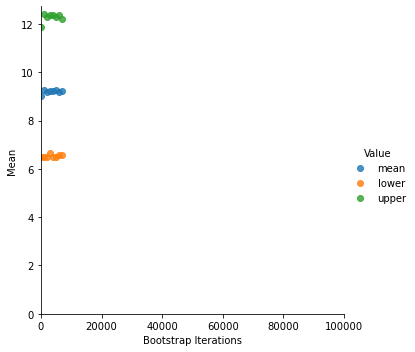

In [8]:
boots = []
for i in range(100, 8000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [42]:
def bootstrap_mean_ci(sample, sample_size, n_bootstraps, ci):
  bootstrap_means = []
  for i in range(n_bootstraps):
    bootstrap_means.append(sum([np.random.choice(sample) for _ in range(sample_size)]) / sample_size)

  bootstrap_means.sort()

  data_mean = sum(bootstrap_means) / len(bootstrap_means)

  bootstrap_means = [x for x in bootstrap_means if x > np.percentile(bootstrap_means, (100 - ci) / 2)]
  bootstrap_means = [x for x in bootstrap_means if x < np.percentile(bootstrap_means, ((100 - ci) / 2) + ci)]

  lower = bootstrap_means[0]
  upper = bootstrap_means[-1]

  return data_mean, lower, upper

bootstrap_mean_ci(data, data.shape[0], 10000 , 90)

(30.478403797468303, 29.379746835443036, 31.59493670886076)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 100000.0)

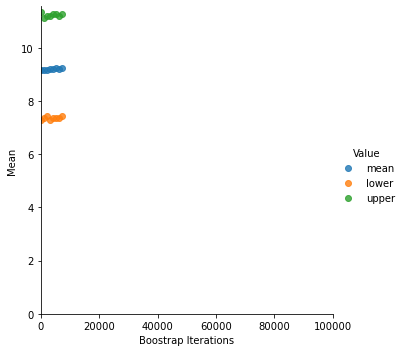

In [10]:
boots = []
for i in range(100, 8000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 100000)

In [11]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean_ci(data, data.shape[0], i, 80)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)

#sns_plot.savefig("bootstrap_confidence_80.pdf", bbox_inches='tight')
#saves plots to pdf

KeyboardInterrupt: 

In [13]:
info = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab2%20-%20bootstrap/vehicles.csv')
info.dropna(subset = ['New Fleet'],inplace = True)
current = info.values.T[0]

new = info.values.T[1]


In [14]:
print(new)

[24. 27. 27. 25. 31. 35. 24. 19. 28. 23. 27. 20. 22. 18. 20. 31. 32. 31.
 32. 24. 26. 29. 24. 24. 33. 33. 32. 28. 19. 32. 34. 26. 30. 22. 22. 33.
 39. 36. 28. 27. 21. 24. 30. 34. 32. 38. 37. 30. 31. 37. 32. 47. 41. 45.
 34. 33. 24. 32. 39. 35. 32. 37. 38. 34. 34. 32. 33. 32. 25. 24. 37. 31.
 36. 36. 34. 38. 32. 38. 32.]


Text(0.5, 1.0, 'Current')

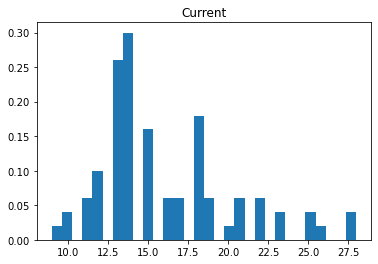

In [15]:
plt.hist(current,density = True,bins = 30)
plt.title("Current")

Text(0.5, 1.0, 'New')

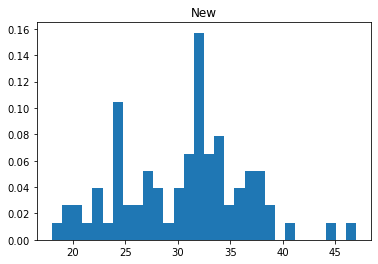

In [16]:
plt.hist(new,density = True, bins = 30)
plt.title("New")

In [17]:
current_mean = current.mean()
new_mean = new.mean()

In [18]:
print(current_mean)
print(new_mean)

16.025316455696203
30.481012658227847


In [19]:
def bootstrap_mean(x, sample_size, n_bootstraps):
    array = np.random.choice(x, size = [n_bootstraps,sample_size], replace = True)
    data_mean = current.mean()
    means = np.mean(array,axis = 1)
    assert means.shape[0] == n_bootstraps
    upper = np.percentile(means, 97.5)
    lower = np.percentile(means,2.5)
    return data_mean, lower, upper


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


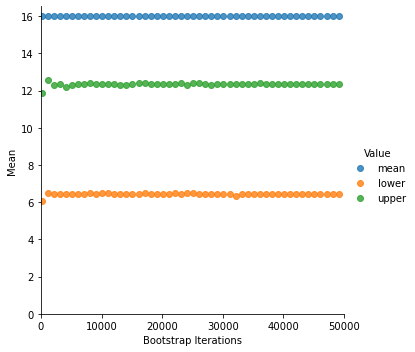

In [20]:
boots = []
for i in range(100, 50000, 1000):
    boot = bootstrap_mean(data, data.shape[0], i)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Bootstrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, 50000)
main()

In [ ]:

# Create your own function for a permutation test here (you will need it for the lab quiz!):
def permut_test(sample1, sample2, n_permutations):
    concat = np.concatenate((sample1,sample2))
    perm = np.random.permutation(concat)
    pold = perm[:int(len(perm)/)]
    return pvalue

/var/folders/_k/vpgblrpj1kj6rd_sfr99jzq40000gn/T/ipykernel_2890/2436066068.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


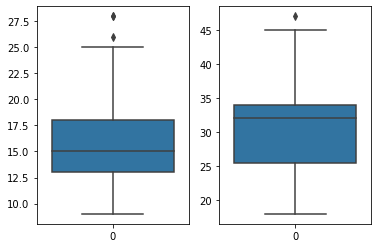

In [21]:
fig, ax = plt.subplots(1,2)
sns.boxplot(data=current, ax=ax[0])
sns.boxplot(data=new, ax=ax[1])
fig.show()

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 4000.0)

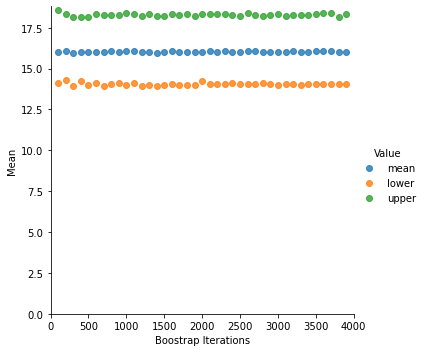

In [23]:
boots = []
max_b = 4000
for i in range(100, max_b, 100):
    boot = bootstrap_mean_ci(current, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, max_b)

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(0.0, 4000.0)

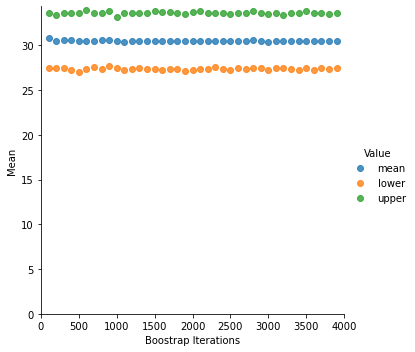

In [24]:
boots = []
max_b = 4000
for i in range(100, max_b, 100):
    boot = bootstrap_mean_ci(new, data.shape[0], i, 95)
    boots.append([i, boot[0], "mean"])
    boots.append([i, boot[1], "lower"])
    boots.append([i, boot[2], "upper"])

df_boot = pd.DataFrame(boots, columns=['Boostrap Iterations', 'Mean', "Value"])
sns_plot = sns.lmplot(df_boot.columns[0], df_boot.columns[1], data=df_boot, fit_reg=False, hue="Value")

sns_plot.axes[0, 0].set_ylim(0,)
sns_plot.axes[0, 0].set_xlim(0, max_b)

In [37]:
def permut_test(sample1, sample2, n_permutations):
    """
    sample1: 1D array
    sample2: 1D array (note that the size of the two arrays can be different)
    n_permutations: number of permutations to calculate the p-value
    """
    len1, len2 = len(sample1), len(sample2)
    m_obs = np.mean(sample2) - np.mean(sample1)

    perms = []

    for i in range(n_permutations):
      concat = np.concatenate((sample1, sample2))
      perm = np.random.permutation(concat)

      pold = perm[:len1]
      pnew = perm[len1:]

      m_perm = np.mean(pnew) - np.mean(pold)
      perms.append(m_perm > m_obs)
    
    pvalue = perms.count(True) / n_permutations
    
    return pvalue


In [38]:
data = new
bootstrap_flex_ci(data, data.shape[0], 10000 , 99, np.std)

(6.012011118265176, 4.884862445227775, 7.210169250335987)

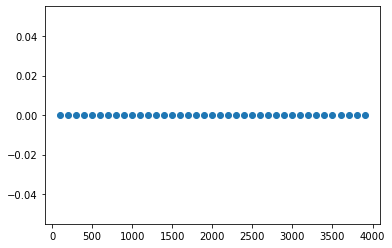

In [27]:
import matplotlib.pyplot as plt

perms = []
idcs = []
max_b = 4000
for i in range(100, max_b, 100):
    p = permut_test(current, new, i)
    perms.append(p)
    idcs.append(i)
    
plt.scatter(x=idcs, y=perms)
plt.show()

In [28]:
def bootstrap_flex_ci(sample, sample_size, n_bootstraps, ci, func):
  bootstraps = []
  for i in range(n_bootstraps):
    sampled = [np.random.choice(sample) for _ in range(sample_size)]
    bootstraps.append(func(sampled))

  bootstraps.sort()

  data_mean = np.mean(bootstraps)

  bootstraps = [x for x in bootstraps if x > np.percentile(bootstraps, (100 - ci) / 2)]
  bootstraps = [x for x in bootstraps if x < np.percentile(bootstraps, ((100 - ci) / 2) + ci)]

  lower = bootstraps[0]
  upper = bootstraps[-1]

  return data_mean, lower, upper

bootstrap_mean_ci(data, data.shape[0], 10000 , 85)

(9.214357142857127, 7.142857142857143, 11.5)

In [39]:

data = new
bootstrap_flex_ci(data, data.shape[0], 10000 , 73, np.std)

(6.009930438140903, 5.523427548425986, 6.552341854989702)

In [31]:
dem_share_PA = [60.08, 40.64, 36.07, 41.21, 31.04, 43.78, 44.08, 46.85, 44.71, 46.15, 63.10, 52.20, 43.18, 40.24, 39.92, 47.87, 37.77, 40.11, 49.85, 48.61, 38.62, 54.25, 34.84, 47.75, 43.82, 55.97, 58.23, 42.97, 42.38, 36.11, 37.53, 42.65, 50.96, 47.43, 56.24, 45.60, 46.39, 35.22, 48.56, 32.97, 57.88, 36.05, 37.72, 50.36, 32.12, 41.55, 54.66, 57.81, 54.58, 32.88, 54.37, 40.45, 47.61, 60.49, 43.11, 27.32, 44.03, 33.56, 37.26, 54.64, 43.12, 25.34, 49.79, 83.56, 40.09, 60.81, 49.81]
dem_share_OH = [56.94, 50.46, 65.99, 45.88, 42.23, 45.26, 57.01, 53.61, 59.10, 61.48, 43.43, 44.69, 54.59, 48.36, 45.89, 48.62, 43.92, 38.23, 28.79, 63.57, 38.07, 40.18, 43.05, 41.56, 42.49, 36.06, 52.76, 46.07, 39.43, 39.26, 47.47, 27.92, 38.01, 45.45, 29.07, 28.94, 51.28, 50.10, 39.84, 36.43, 35.71, 31.47, 47.01, 40.10, 48.76, 31.56, 39.86, 45.31, 35.47, 51.38, 46.33, 48.73, 41.77, 41.32, 48.46, 53.14, 34.01, 54.74, 40.67, 38.96, 46.29, 38.25, 6.80, 31.75, 46.33, 44.90, 33.57, 38.10, 39.67, 40.47, 49.44, 37.62, 36.71, 46.73, 42.20, 53.16, 52.40, 58.36, 68.02, 38.53, 34.58, 69.64, 60.50, 53.53, 36.54, 49.58, 41.97, 38.11]

print("Amount in PA: ", len(dem_share_PA))
print("Amount in OH: ", len(dem_share_OH))

Amount in PA:  67
Amount in OH:  88


In [35]:
print("Mean 95% confidence interval for PA: ", bootstrap_flex_ci(dem_share_PA, len(dem_share_PA), 25000, 90, np.mean))
print("Mean 95% confidence interval for OH: ", bootstrap_flex_ci(dem_share_OH, len(dem_share_OH), 25000, 90, np.mean))

Mean 95% confidence interval for PA:  (45.465184071641794, 43.54059701492537, 47.50164179104477)
Mean 95% confidence interval for OH:  (44.30405374090909, 42.56363636363636, 46.041363636363634)


In [33]:
print("P-value: ", permut_test(dem_share_OH, dem_share_PA, 10000))

P-value:  0.2341
